1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats 
import seaborn as sns
import math
import pandas as pd
import random


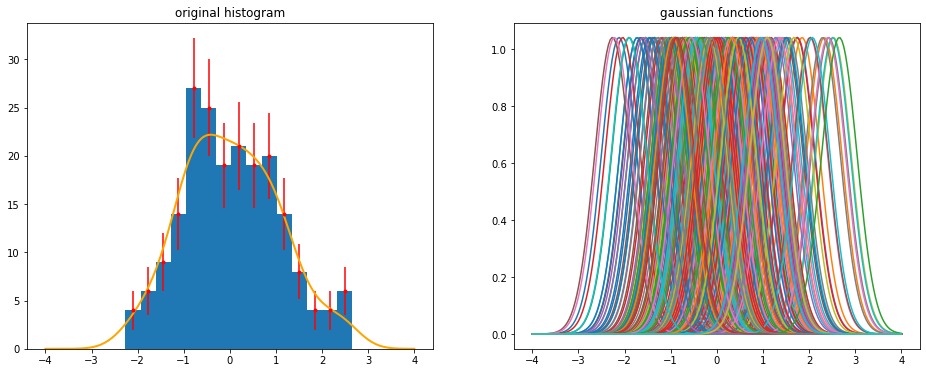

In [2]:
mean = 0
std = 1
N = 200
A = np.random.normal(mean,std,N)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
entries, edges, bar = ax1.hist(A, bins = 15)
bin_centers = 0.5 * (edges[:-1] + edges[1:])
bars = ax1.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.')
ax1.set_title('original histogram')

std_ = 1.06*A.std()*A.size**(-1/5)
x = np.linspace(-4,4,200)
gaussians = np.array([stats.norm.pdf(x, loc = A[i], scale = std_) for i in range(len(x))])
for i in range(len(A)):
    ax2.plot(x, gaussians[i])
    
ax2.set_title('gaussian functions')

sum_gaussians = np.sum(gaussians, axis = 0)
Z = sp.integrate.trapz(sum_gaussians, x)
width = edges[1] - edges[0]
area = width * N
ax1.plot(x, sum_gaussians*area/Z, color ="orange", linewidth = 2)
plt.show()


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

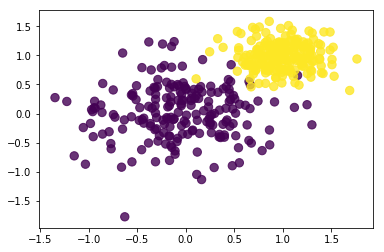

In [3]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

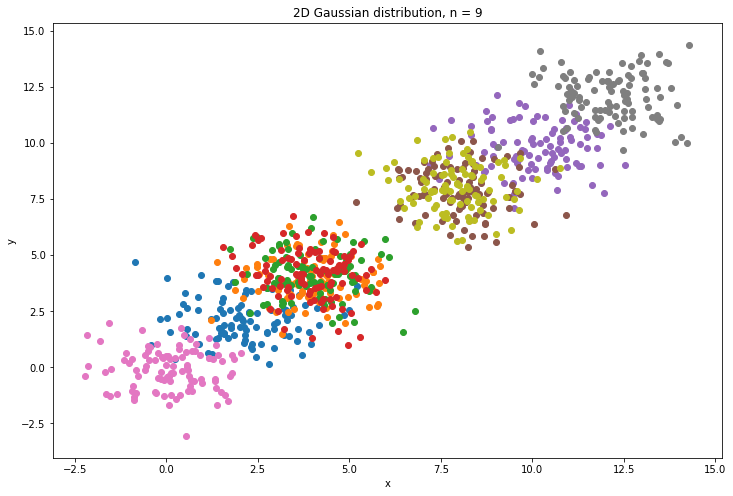

In [4]:
n = 9
N = 100
std = 1
fig, ax = plt.subplots(1,1,figsize = (12,8))
ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_title('2D Gaussian distribution, n = ' + str(n))
for i in range(0,n):
    mean = (random.randrange(9))*2
    xs = np.random.normal(mean, std, N)
    ys = np.random.normal(mean, std, N)
    ax.scatter(x=xs,y=ys,marker ='o')


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
data = pd.DataFrame(np.load("residuals_261.npy",allow_pickle=True).item())
data.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [6]:
data = data[np.abs(data['residuals'])<2]
data.head()

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0


[ 0.          2.22222222  4.44444444  6.66666667  8.88888889 11.11111111
 13.33333333 15.55555556 17.77777778 20.        ] [ 1.11111111  3.33333333  5.55555556  7.77777778 10.         12.22222222
 14.44444444 16.66666667 18.88888889 21.11111111]


<ErrorbarContainer object of 3 artists>

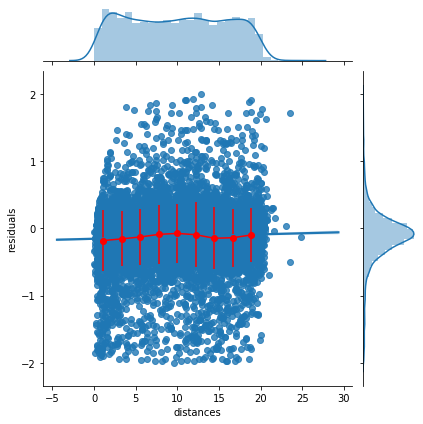

In [7]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(data['distances'], data['residuals'])
jointplot = sns.jointplot(x="distances", y="residuals", data=data, kind= "reg")
x = np.linspace(0, 20, 10)
y = [np.mean(data['residuals'][data['distances']>x[i]][data['distances']<x[i+1]]) for i in range(0,len(x)-1)]
erry = [np.std(data['residuals'][data['distances']>x[i]][data['distances']<x[i+1]]) for i in range(0,len(x)-1)]
x_c = x+(x[1]/2)
print(x,x_c)
plt.errorbar(x_c[:-1], y, yerr = erry, color = 'red', marker = 'o')